In [1]:
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)
config = tf.compat.v1.ConfigProto(gpu_options=gpu_options)
tf.compat.v1.enable_eager_execution(config=config)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.FATAL)

In [2]:
import numpy as np
from link_bot_classifiers.visualization import plot_classifier_data
from link_bot_data.classifier_dataset import ClassifierDataset
import pathlib
import matplotlib.pyplot as plt
import json

In [3]:
plt.style.use("slides")

In [4]:
labeling_params = json.load(pathlib.Path("./labeling_params/tether.json").open("r"))
paths = [pathlib.Path("./classifier_data/derp-tether-1/")]
dataset = ClassifierDataset(paths, labeling_params)
tf_dataset = dataset.get_datasets(mode='test')

In [5]:
def compute_wigglyness(rope):
    points = rope.reshape([-1, 2])
    xs = points[:, 0]
    ys = points[:, 1]
    dxs = xs[1:] - xs[:-1]
    dys = ys[1:] - ys[:-1]
    angles = np.abs(np.arctan2(dys, dxs))
    wigglyness = np.sum(angles)
    return wigglyness

In [8]:
wigglynesses = []
stdevs = []
for example in tf_dataset:
    stdev = example['stdev_next'].numpy()
    stdevs.append(stdev)
wigglynesses = np.array(wigglynesses)
stdevs = np.array(stdevs)

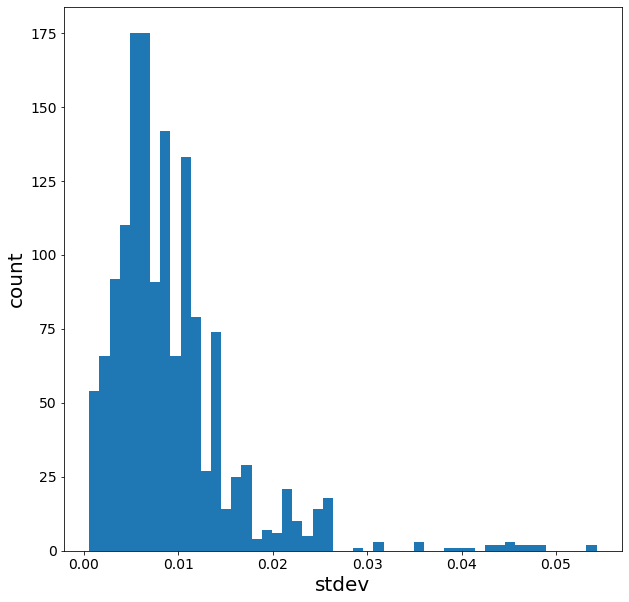

In [11]:
plt.figure(figsize=(10,10))
plt.hist(stdevs, bins=50)
plt.xlabel("stdev")
plt.ylabel("count");
plt.show()

In [12]:
dataset_list = list(iter(tf_dataset))

In [13]:
dataset_np = np.array(dataset_list, dtype=object)

In [14]:
sorted_indices = np.argsort(stdevs)
sorted_stdevs = stdevs[sorted_indices]
sorted_examples = dataset_np[sorted_indices]

In [18]:
print(sorted_stdevs[0])
print(sorted_examples[0]['stdev_next'])
print(sorted_stdevs[-1])
print(sorted_examples[-1]['stdev_next'])

0.00057010015
tf.Tensor(0.00057010015, shape=(), dtype=float32)
0.05430584
tf.Tensor(0.05430584, shape=(), dtype=float32)


In [19]:
def plot_rope_example(ax, example):
    label = example['label'].numpy().squeeze()
    full_env = example['full_env/env'].numpy()
    full_env_extent = example['full_env/extent'].numpy()
    res = example['full_env/res'].numpy()
    state = example['link_bot'].numpy()
    action = example['action'].numpy()
    next_state = example['link_bot_next'].numpy()
    planned_next_state = example['planned_state/link_bot_next'].numpy()
    stdev_next = example['stdev_next'].numpy()

    plot_classifier_data(
        ax=ax,
        next_state=next_state,
        action=action,
        planned_next_state=planned_next_state,
        res=res,
        state=state,
        actual_env=full_env,
        actual_env_extent=full_env_extent,
        title="Label = {}, stdev (next)={:.3f}".format(label, stdev_next),
        label=label)
    plt.legend()
    plt.tight_layout()
    plt.show(block=True)

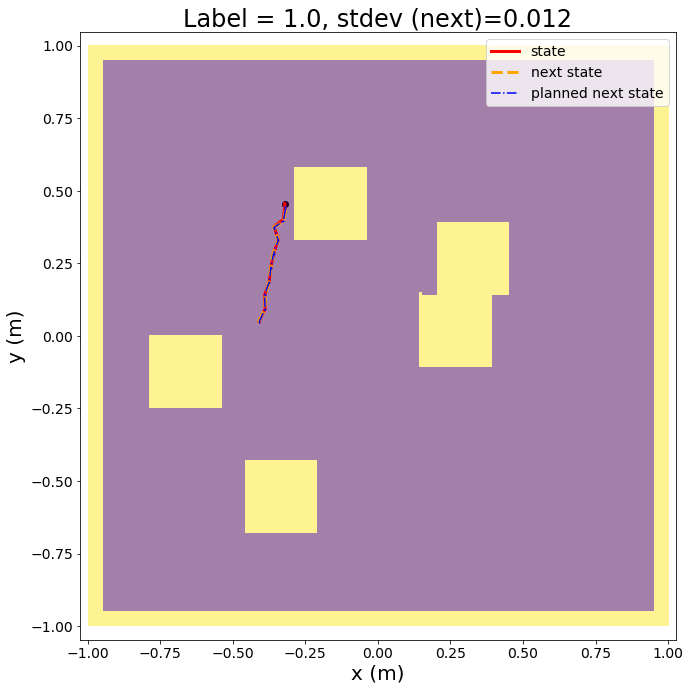

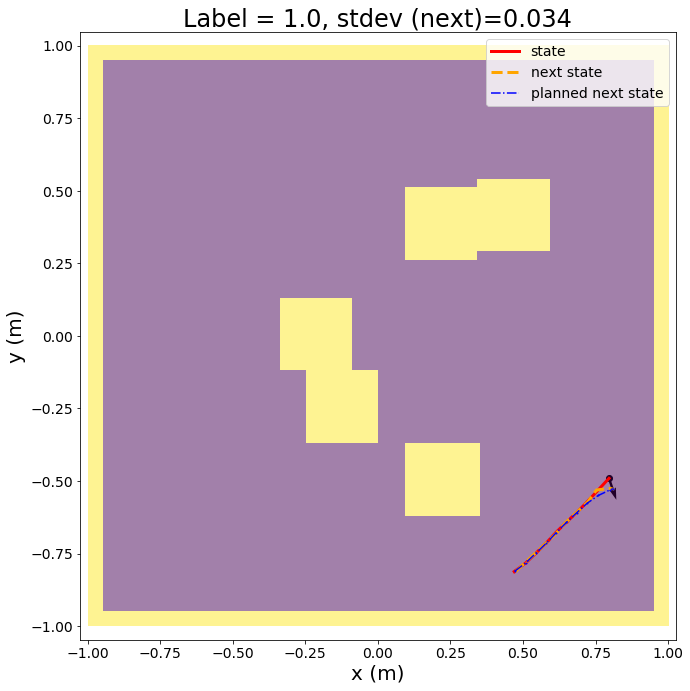

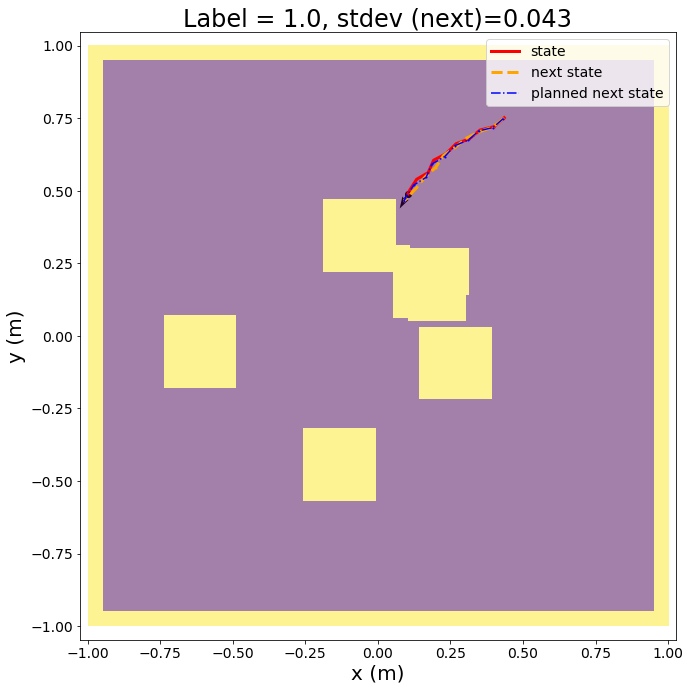

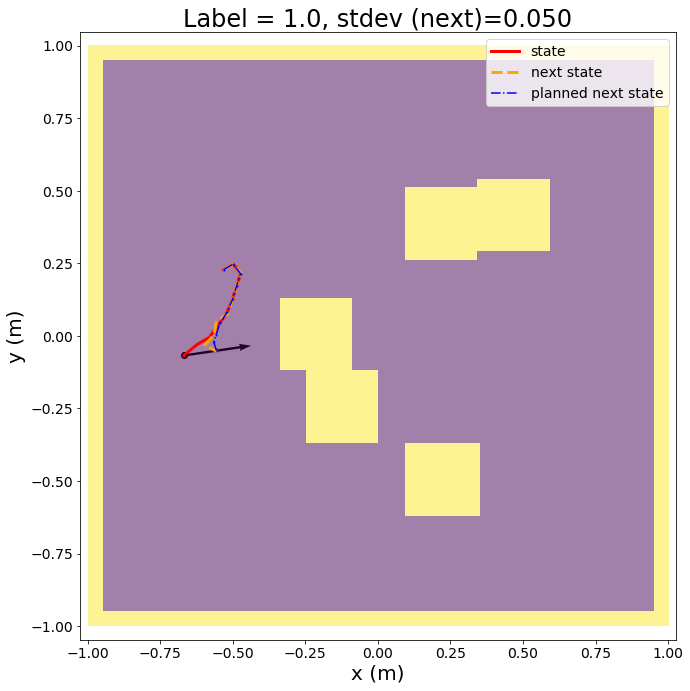

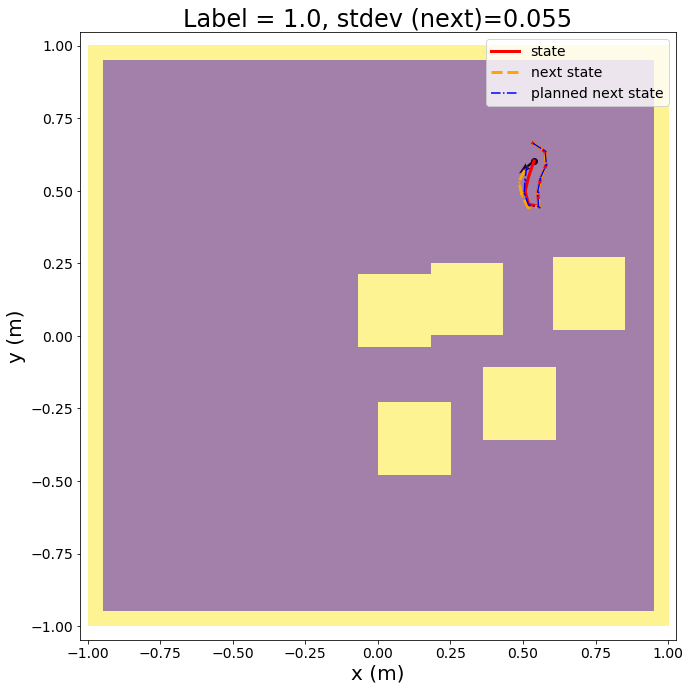

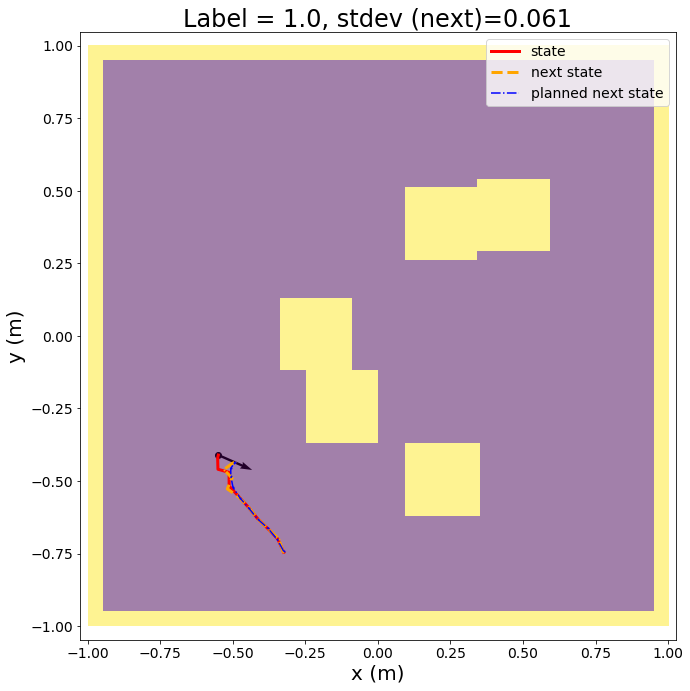

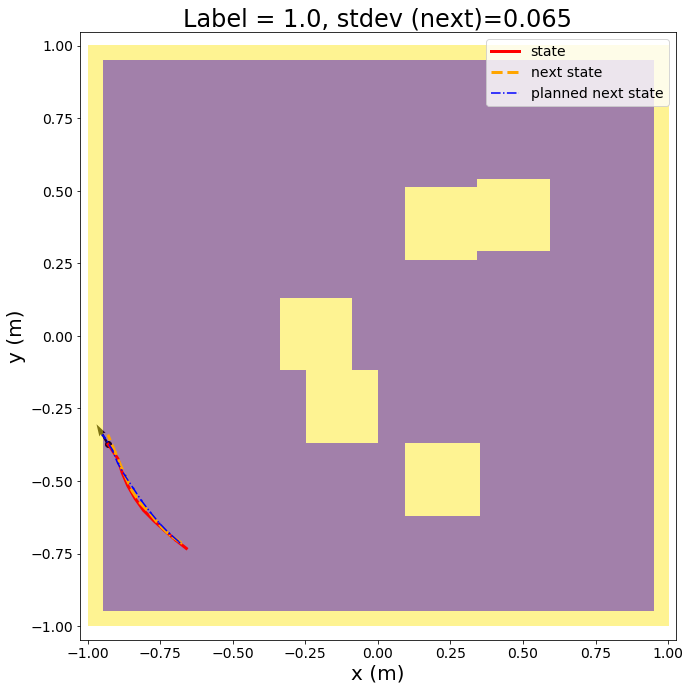

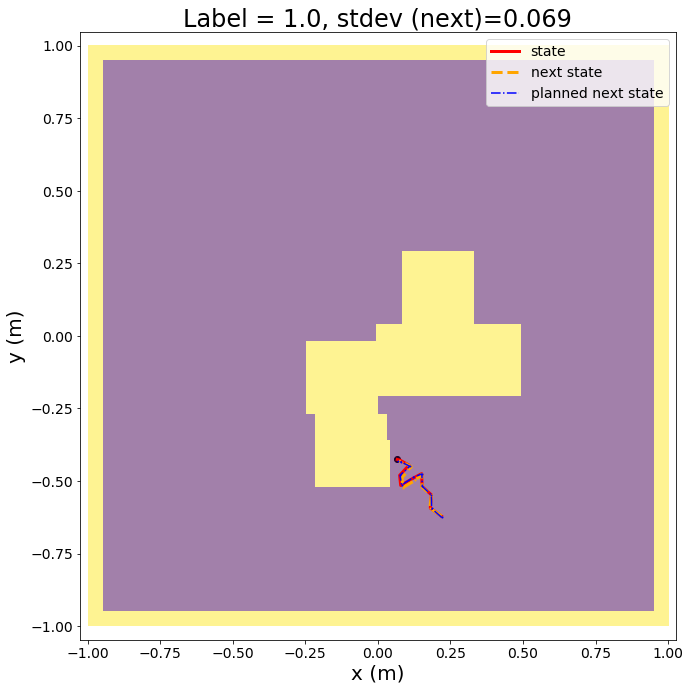

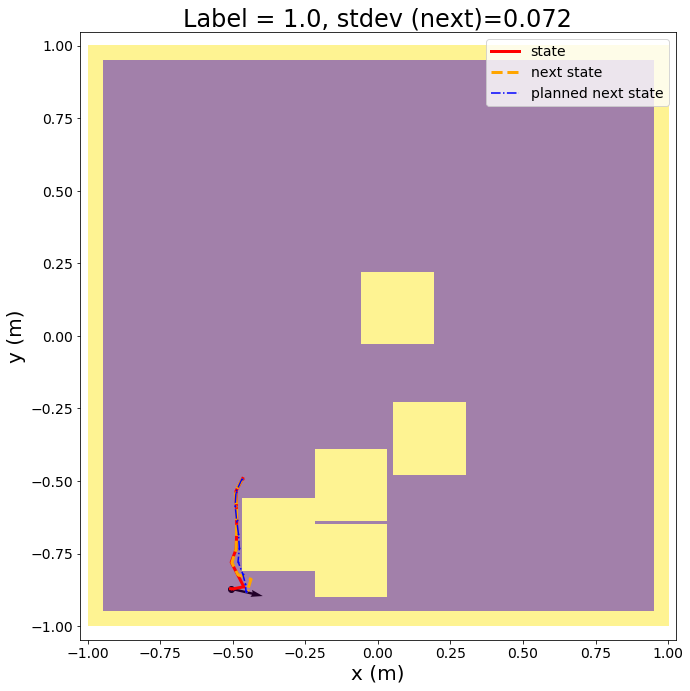

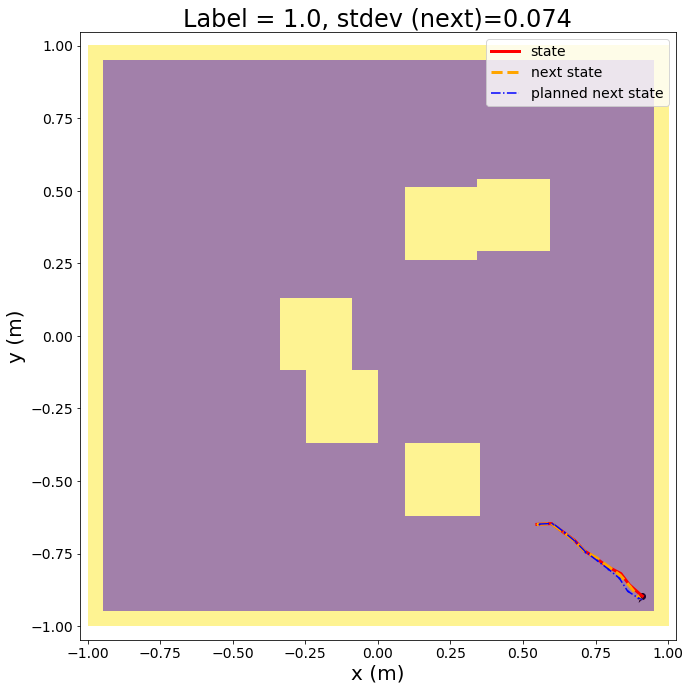

In [85]:
top_k = 1000 
for best_example in sorted_examples[:top_k:100]:
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    plot_rope_example(ax, best_example)

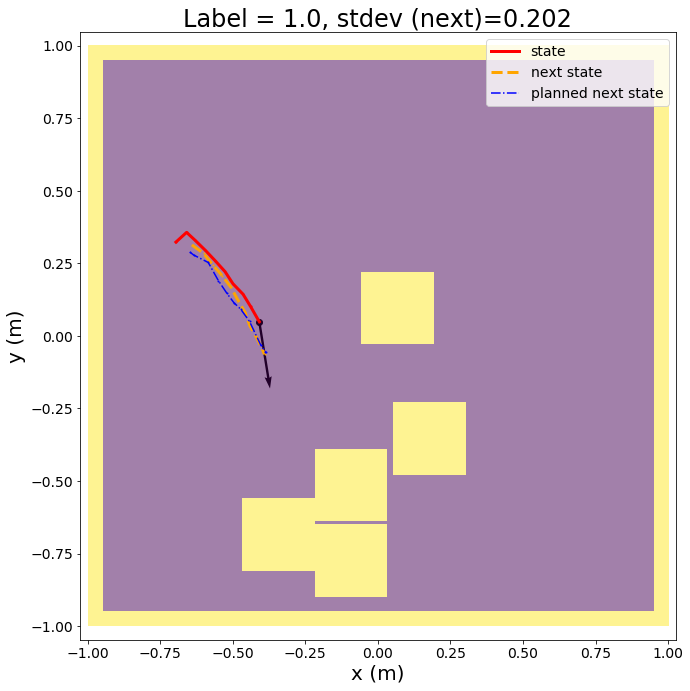

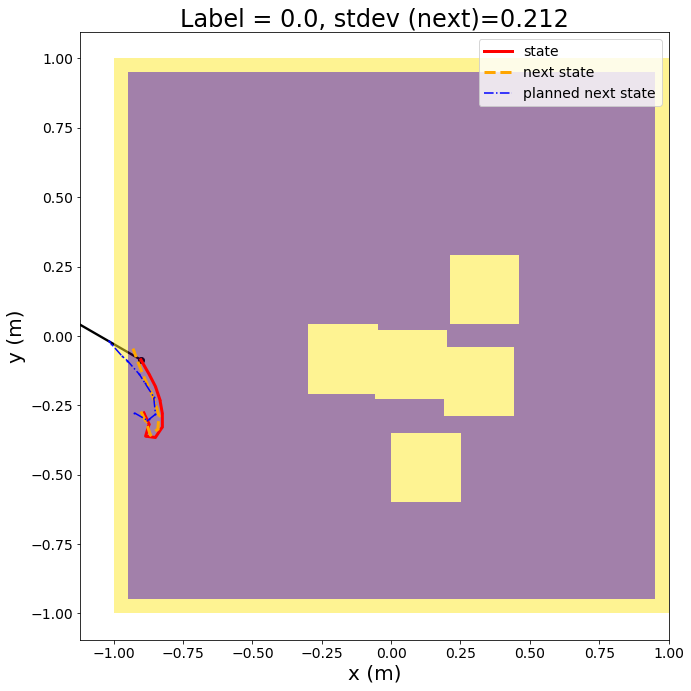

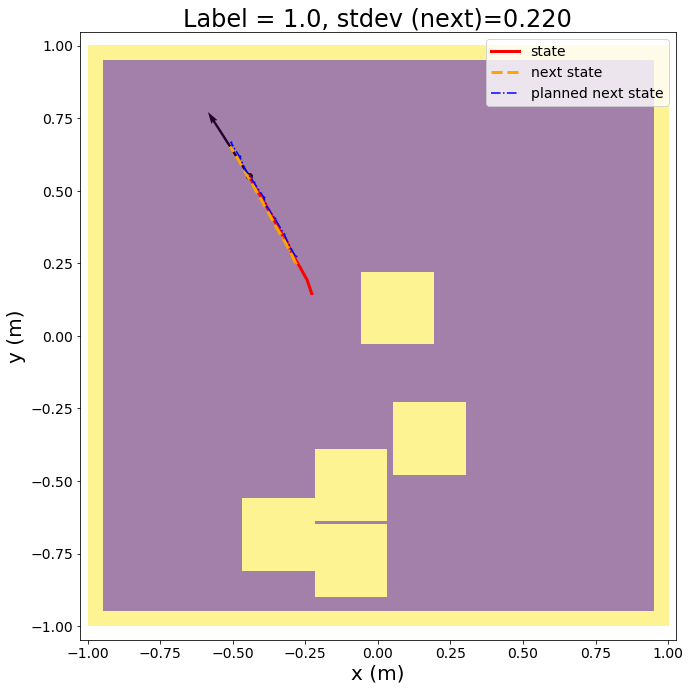

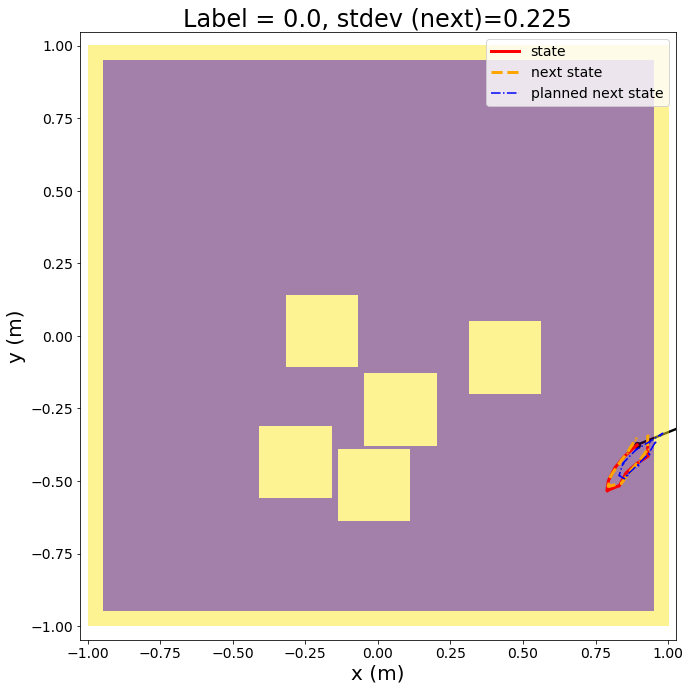

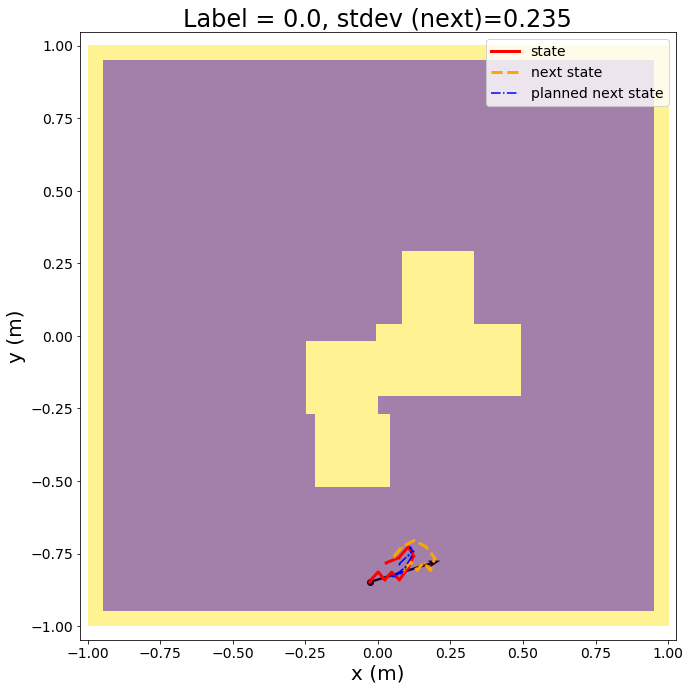

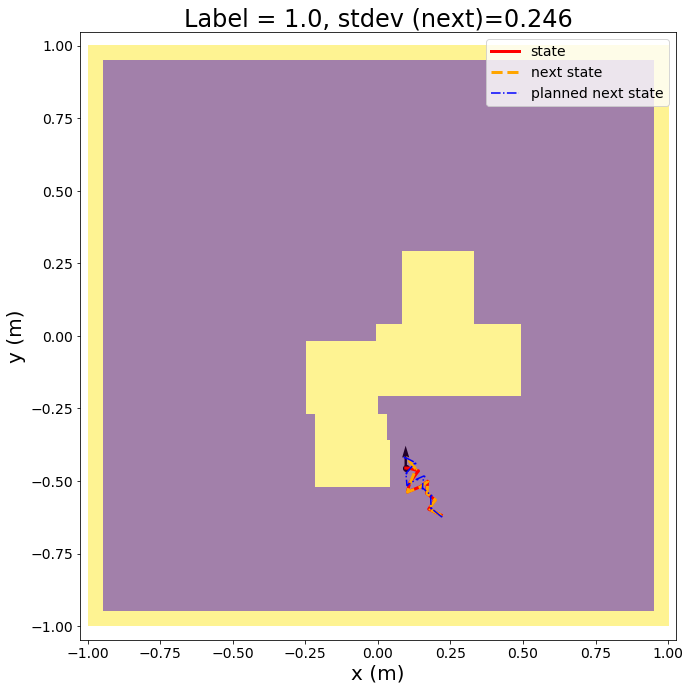

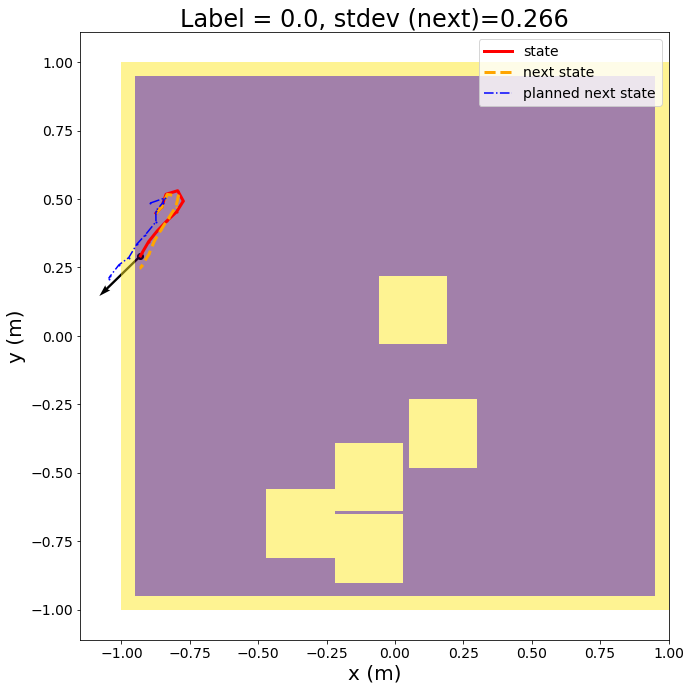

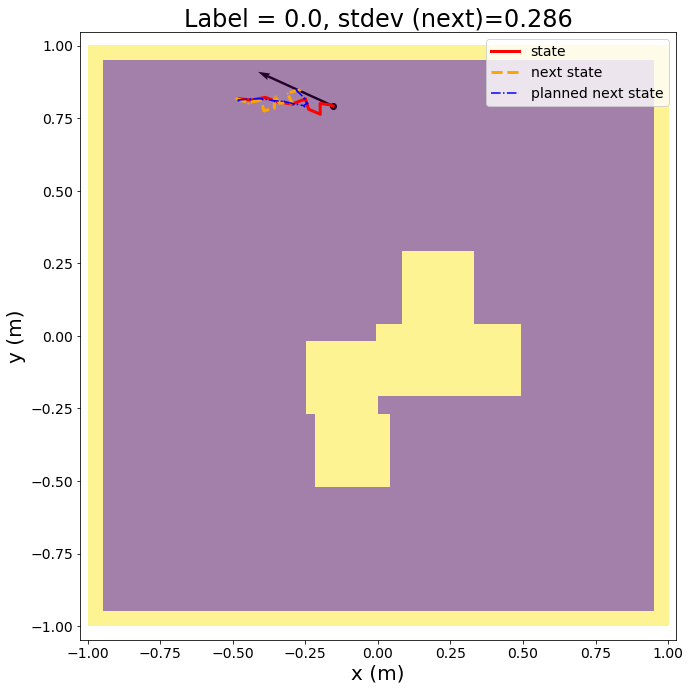

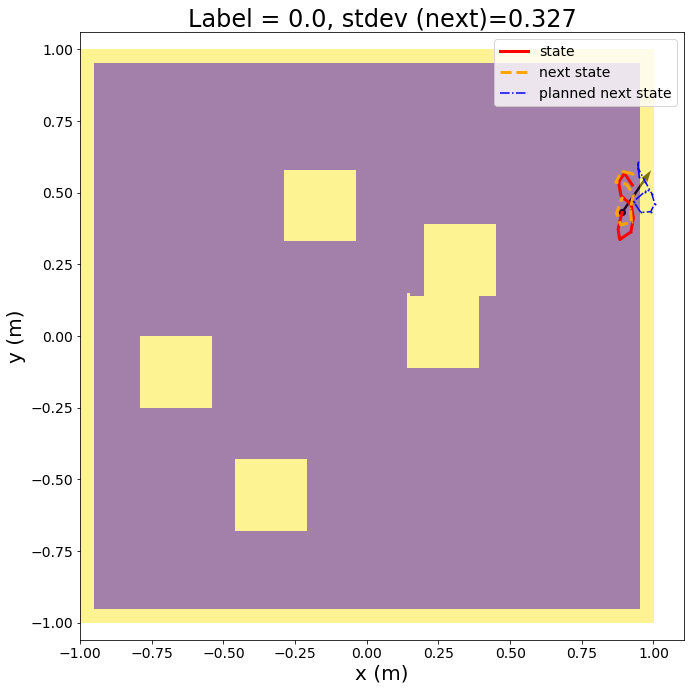

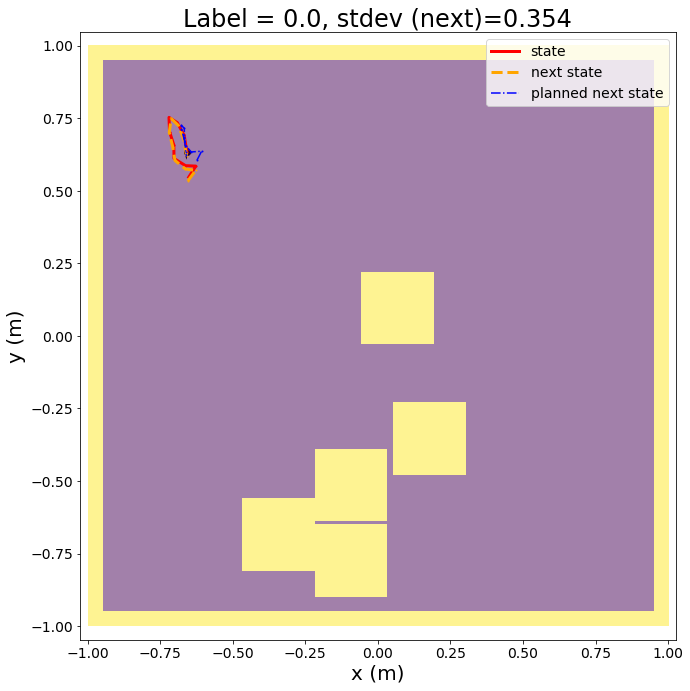

In [84]:
bottom_k = 1000 
for best_example in sorted_examples[-bottom_k::100]:
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    plot_rope_example(ax, best_example)